In [1]:
from IPython.core.display import display

import matplotlib as mpl
mpl.rc('text', usetex = True)
mpl.rc('font', size = 14)

In [2]:
from MoneyGridModel import MoneyGridModel

In [9]:
# store data from num_runs
num_runs = 100

# each run has num_steps steps
num_steps = 100

# each model has num_agents agents
num_agents = 500

# size of the grid
grid_width = 50
grid_height = 50

# data from all simulations
wealth_data = []
agent_counts = np.zeros((grid_width, grid_height))

In [10]:
for _ in range(num_runs):
    # create a model
    model = MoneyGridModel(num_agents, grid_width, grid_height)

    # execute num_steps steps
    for _ in range(num_steps):
        model.step()
        
    for a in model.schedule.agents:
        wealth_data.append(a.wealth)

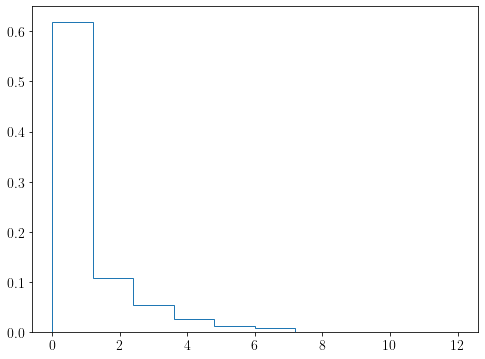

In [11]:
fig = mpl.figure.Figure(figsize=(8,6))

axs = fig.add_subplot()

axs.hist(wealth_data, density=True, histtype='step')

display(fig)

In [12]:
for cell in model.grid.coord_iter():
    cell_content, x, y = cell
    agent_counts[x][y] = len(cell_content)    

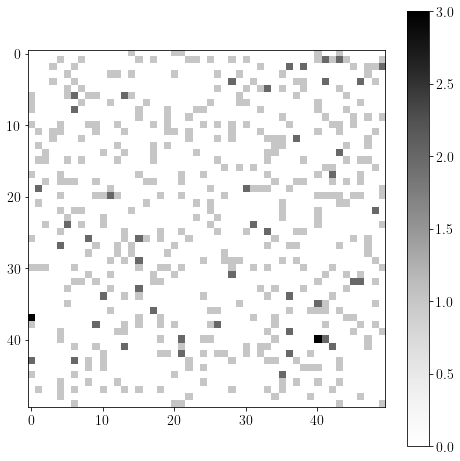

In [13]:
fig = mpl.figure.Figure(figsize=(8,8))

axs = fig.add_subplot()

axs.imshow(agent_counts, interpolation='none', cmap=mpl.cm.Greys)

norm = mpl.cm.colors.Normalize(vmin=agent_counts.min(), vmax=agent_counts.max())
fig.colorbar(mpl.cm.ScalarMappable(cmap=mpl.cm.Greys, norm=norm), ax=axs)

display(fig)

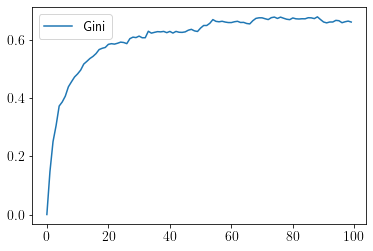

In [15]:
gini = model.datacollector.get_model_vars_dataframe()
gini.plot()

In [25]:
gini.

,Gini
0,0.000000
1,0.147200
2,0.250168
3,0.305424
4,0.372424
...,...
95,0.665344
96,0.658504
97,0.661776
98,0.664096
